In [45]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
N = 100
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)

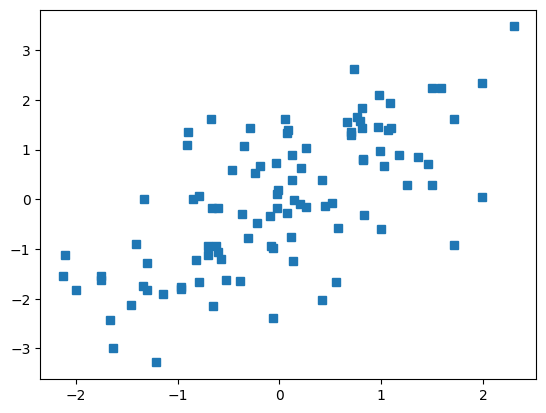

In [33]:
plt.plot(x,y, 's')
plt.show()

In [39]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

In [40]:
learningRate = 0.05

lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(params=ANNreg.parameters(), lr=learningRate)

In [47]:
trainidx = np.random.choice(range(N), 80, replace=False)
trainBool = np.zeros(N, dtype=bool)
trainBool[trainidx] = True

train_data, test_data, train_labels, test_labels = train_test_split(x,y, train_size=.8)

print(train_data.shape)
print(test_data.shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [49]:
numEpochs = 500

for epochi in range(numEpochs):
    yHat = ANNreg(train_data)

    loss = lossfun(yHat, train_labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [50]:
predYtest = ANNreg(test_data)
testloss = (predYtest-test_labels).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 1.03
Final TEST loss: 1.18


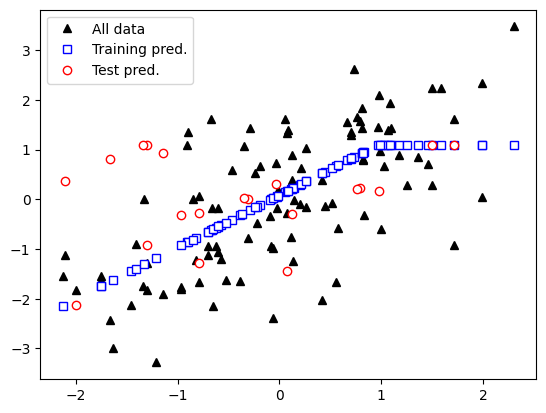

In [51]:
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()